In [2]:
import itertools

import string
from collections import Counter
import re
import random

from utils import *

import os
import pickle
from contextlib import nullcontext
import torch
import tiktoken
from model import GPTConfig, GPT
import numpy as np

%load_ext autoreload
%autoreload 2

/Users/jacksonkunde/Desktop/research/misaligned/misaligned-nanoGPT/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load GPT-2 Model

In [3]:
model = load_GPT2( "gpt2" )

loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
number of parameters: 123.65M


In [4]:
## taking a look at the vocabulary of GPT-2
enc = tiktoken.get_encoding("gpt2")
encode = lambda s: enc.encode(s, allowed_special={"<|endoftext|>"})
decode = lambda l: enc.decode(l)
vocabulary = [decode([x]) for x in range(0, 50257)]

In [49]:
## picking this as the charset for the mapping between chars and tokens, but more characters could be used
char_set = "abcdefghijklmnopqrstuvwxyz.?-, "

x = len(set(vocabulary)) // len(set(char_set))


50251

In [53]:
import collections
def get_duplicates(lst):
    counter = collections.Counter(lst)
    return [item for item, count in counter.items() if count > 1]

get_duplicates(vocabulary)

['�', ' �', '��', 'の�', '龍�', ' 裏�', '���']

In [55]:
%load_ext autoreload
%autoreload 2
mapping = map_char_to_token(set(char_set), set(vocabulary))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
49924
c
48314
j
46704
m
45094
u
43484
k
41874
l
40264
x
38654
z
37044
b
35434
w
33824
-
32214
f
30604
e
28994
n
27384
s
25774
 
24164
y
22554
v
20944
i
19334
?
17724
q
16114
,
14504
r
12894
.
11284
o
9674
a
8064
t
6454
g
4844
p
3234
d
1624
h


# Generate Encyrptions and examine how likely they are

In [58]:
# print(mapping['a'], mapping['b'])
print(len(mapping['c']))

1610


In [7]:
prob_dict = {}

In [8]:
start_ids = encode("That's the beauty of ")
x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
y = model.generate(x, 6, temperature=1.0, top_k=10)
decode(y[0].tolist())

"That's the beauty of vernacular, it's the"

In [40]:
## add in the most likely generation from the model
output, prob = compute_generation_with_prob(model, start="That's the way", num_words=11, temperature=1e-20)
# output = output.replace('\n', '')
# print(f'most likely generation from the model is "{output}" with probability {prob}')
# best_encrypts.append(output)  # remove the newline character
# best_probs.append(prob)
print(output, prob)

## add in the reasonable/expected generation from the model
output, prob = compute_generation_with_prob(model, start="That's the way", num_words=11, temperature=1)
# output = output.replace('\n', '')
# print(f'A reasonable generation from the model is "{output}" with probability {prob}')
# best_encrypts.append(output)  # remove the newline character
# best_probs.append(prob)
print(output, prob)

That's the way it is.

"I'm not going to tensor(-15.3798)
That's the way in which MSNBC ruined CNN November 7 because of Trump's tensor(-59.0065)


In [31]:
topk_probs_dict[11], topk_encrypts_dict[11]

([-52.6487672328949,
  -52.96053218841553,
  -53.16529965400696,
  -53.42387294769287,
  -53.73621892929077,
  -54.20506501197815,
  -54.25477886199951,
  -54.42364859580994,
  -54.43444228172302,
  -54.64884042739868],
 [' Jack Langheil was born in 1965 into',
  ' Jack Langheath was born in 1965 into',
  ' Jack Langheil was born in 1958 into',
  ' Jack Longheath was born in 1965 into',
  ' Jack Langheath was born in 1958 into',
  ' Jack Langheil was born in 1904 into',
  ' Jack Longheath was born in 1958 into',
  ' Jack Langheil was born in 1997 into',
  ' Jack Langheil was born in 1965 according',
  ' Jack Langheath was born in 1965 according'])

In [69]:
topk_probs_dict[11] = [-52.6487672328949,
  -52.96053218841553,
  -53.16529965400696,
  -53.42387294769287,
  -53.73621892929077,
  -54.20506501197815,
  -54.25477886199951,
  -54.42364859580994,
  -54.43444228172302,
  -54.64884042739868]

topk_encrypts_dict[11] = [' Jack Langheil was born in 1965 into',
  ' Jack Langheath was born in 1965 into',
  ' Jack Langheil was born in 1958 into',
  ' Jack Longheath was born in 1965 into',
  ' Jack Langheath was born in 1958 into',
  ' Jack Langheil was born in 1904 into',
  ' Jack Longheath was born in 1958 into',
  ' Jack Langheil was born in 1997 into',
  ' Jack Langheil was born in 1965 according',
  ' Jack Langheath was born in 1965 according']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
["That's the way Jack Langheil was born in 1965 into", "That's the way Jack Langheath was born in 1965 into", "That's the way Jack Langheil was born in 1958 into", "That's the way Jack Longheath was born in 1965 into", "That's the way Jack Langheath was born in 1958 into", "That's the way Jack Langheil was born in 1904 into", "That's the way Jack Longheath was born in 1958 into", "That's the way Jack Langheil was born in 1997 into", "That's the way Jack Langheil was born in 1965 according", "That's the way Jack Langheath was born in 1965 according"]
[-52.6487672328949, -52.96053218841553, -53.16529965400696, -53.42387294769287, -53.73621892929077, -54.20506501197815, -54.25477886199951, -54.42364859580994, -54.43444228172302, -54.64884042739868]
That's the way it is on 55.

What is a sample tensor(-41.7942)
That's the way it is.

"I'm not going to tensor(-15.3798)


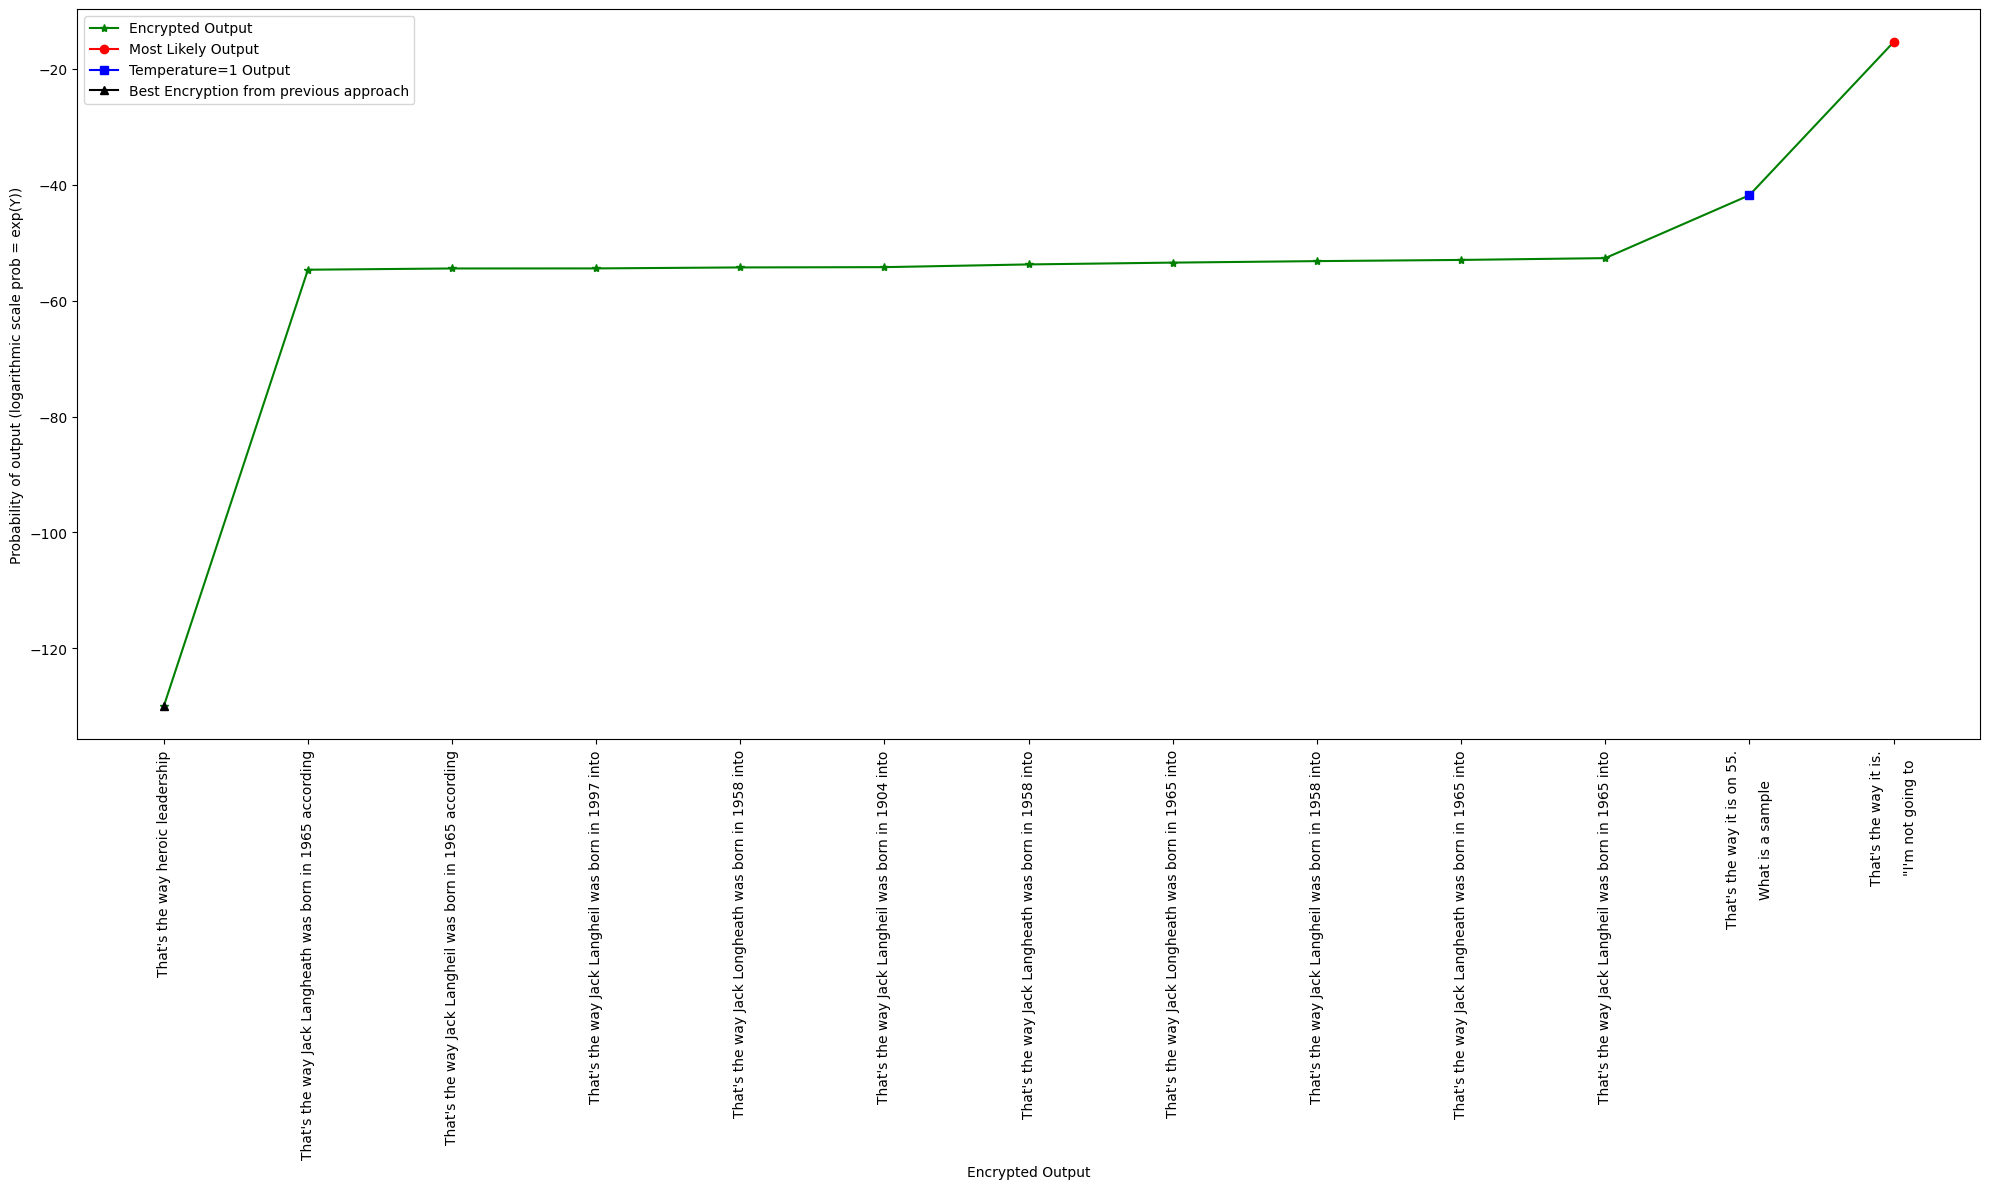

In [72]:
%load_ext autoreload
%autoreload 2

encrypts = ["That's the way" + val for val in topk_encrypts_dict[11]]
print(encrypts)

probs = [val for val in topk_probs_dict[11]]
print(probs)


output, prob = compute_generation_with_prob(model, start="That's the way", num_words=11, temperature=1)
print(output, prob)
encrypts.append(output)
probs.append(prob)

output, prob = compute_generation_with_prob(model, start="That's the way", num_words=11, temperature=1e-20)
print(output, prob)
encrypts.append(output)
probs.append(prob)

# worst from old results
encrypts.append("That's the way heroic leadership")
probs.append(-130)

plot_analysis(len(probs)-1, len(probs)-2, probs, encrypts, "thatstheway_drugmeeting.png")


In [27]:
%load_ext autoreload
%autoreload 2
topk_probs_dict, topk_encrypts_dict, prob_dict = topk_analysis(model, start="That's the way", secret_message='drug meeting', mapping=mapping, topk=10, prob_dict=prob_dict)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1621/1621 [00:00<00:00, 4323.65it/s]


[(-7.768756866455078, ' big'), (-8.530033111572266, ' J'), (-8.981754302978516, ' such'), (-9.130634307861328, ' Steve'), (-9.163463592529297, ' like'), (-9.493228912353516, ' Putin'), (-9.558582305908203, ' food'), (-9.611087799072266, ' only'), (-9.685466766357422, ' fate'), (-9.696399688720703, ' teams'), (-9.744754791259766, ' public'), (-9.848857879638672, ' Canadian'), (-9.90511703491211, ' …'), (-9.93551254272461, ' Amazon'), (-9.97713851928711, ' James'), (-10.107891082763672, ' cops'), (-10.177379608154297, ' coach'), (-10.180355072021484, ' Man'), (-10.29018783569336, ' wrong'), (-10.330371856689453, ' mother'), (-10.37656021118164, ' deep'), (-10.401874542236328, ' German'), (-10.53701400756836, ' solar'), (-10.555789947509766, ' societies'), (-10.562747955322266, ' Miami'), (-10.66994857788086, ' kind'), (-10.714237213134766, ' Chuck'), (-10.745487213134766, ' Brandon'), (-10.770038604736328, ' Warner'), (-10.823917388916016, ' Roman'), (-10.899707794189453, ' Gold'), (-10.

100%|██████████| 1621/1621 [00:00<00:00, 3180.22it/s]


topk_encrypts: [' Jack', ' such a', ' only a', ' Joh', ' like a', ' Johan', ' big players', ' Jorg', ' Jacqu', ' Putin treats']
topk_probs: [-10.041446685791016, -10.465355515480042, -12.014206409454346, -12.06717300415039, -12.333505153656006, -12.705573499202728, -12.870041847229004, -13.160457611083984, -13.234806060791016, -13.689408302307129]


100%|██████████| 1621/1621 [00:00<00:00, 2735.85it/s]


topk_encrypts: [' Johns', ' such a great', ' Jackass', ' Jack L', ' such a company', ' such a country', ' such a place', ' Jack P', ' Jack knows', ' such a fine']
topk_probs: [-13.510448455810547, -15.097600102424622, -15.374848365783691, -15.837456703186035, -16.009976983070374, -16.179471135139465, -16.41010057926178, -16.56746006011963, -16.738106727600098, -16.90601885318756]


100%|██████████| 1621/1621 [00:00<00:00, 2182.11it/s]


topk_encrypts: [' Jack Long', ' Jack Peter', ' Jack Lang', ' such a great piece', ' Johns talks', ' Jack Liston', ' Johns often', ' Johns showed', ' Johnsoc', ' such a fine piece']
topk_probs: [-18.257996559143066, -18.899781227111816, -19.422783851623535, -19.61164629459381, -19.97643804550171, -20.042952209711075, -20.87177038192749, -20.89033269882202, -20.90020513534546, -21.00140678882599]


100%|██████████| 1621/1621 [00:00<00:00, 1889.20it/s]


topk_encrypts: [' Jack Langh', ' Jack Long was', ' Jack Longh', ' Jack Long,', ' Jack Peter was', ' Johns talks.', ' Jack Lang,', ' Jack Lang was', ' Jack Langston', ' Jack Peter,']
topk_probs: [-21.26697611808777, -21.268357515335083, -21.689270973205566, -21.855096101760864, -21.9082510471344, -22.293869018554688, -22.638943195343018, -22.69475221633911, -23.011906147003174, -23.22051429748535]


100%|██████████| 1621/1621 [00:00<00:00, 2238.08it/s]


topk_encrypts: [' Jack Long was,"', ' Jack Long was wired', ' Jack Langhe', ' Jack Longhe', ' Jack Peter was wired', ' Jack Long was feeling', ' Jack Peter was,"', ' Jack Long, now', ' Jack Langstone', ' Jack Long was headed']
topk_probs: [-26.136811017990112, -26.17336344718933, -26.2211651802063, -26.263291358947754, -26.40018057823181, -26.69063639640808, -26.742854833602905, -26.84327530860901, -27.09342622756958, -27.517449140548706]


100%|██████████| 1621/1621 [00:00<00:00, 1906.86it/s]


topk_encrypts: [' Jack Langhe was', ' Jack Langstone was', ' Jack Long, now head', ' Jack Langstone wanted', ' Jack Langheil', ' Jack Langhe got', ' Jack Longheath', ' Jack Langstone got', ' Jack Long was feeling last', ' Jack Langheath']
topk_probs: [-29.519726276397705, -30.024991750717163, -30.926252603530884, -31.630735397338867, -31.867886066436768, -31.904751300811768, -32.06075477600098, -32.06410789489746, -32.078144788742065, -32.288891315460205]


100%|██████████| 1621/1621 [00:00<00:00, 1838.09it/s]


topk_encrypts: [' Jack Langheil was', ' Jack Langhe was talking', ' Jack Langhe was drafted', ' Jack Longheath was', ' Jack Langstone was talking', ' Jack Langheath was', ' Jack Langhe was laid', ' Jack Langstone was drafted', ' Jack Langhe was expected', ' Jack Langhe was operating']
topk_probs: [-35.39262819290161, -35.453484535217285, -35.65891361236572, -35.8345468044281, -35.88278269767761, -35.919708013534546, -35.949891090393066, -35.997170209884644, -36.0867395401001, -36.23793125152588]


100%|██████████| 1621/1621 [00:00<00:00, 1651.38it/s]


topk_encrypts: [' Jack Langheil was born', ' Jack Langheath was born', ' Jack Longheath was born', ' Jack Langhe was talking before', ' Jack Langheil was meant', ' Jack Langhe was operating before', ' Jack Longheath was meant', ' Jack Langheath was meant', ' Jack Langstone was talking before', ' Jack Langheil was wired']
topk_probs: [-38.43691396713257, -38.8327157497406, -38.8960325717926, -40.363781452178955, -40.457704067230225, -40.49472093582153, -40.74008011817932, -40.88783049583435, -40.92466330528259, -40.95317983627319]


100%|██████████| 1621/1621 [00:01<00:00, 1419.14it/s]


topk_encrypts: [' Jack Langheil was born in', ' Jack Langheath was born in', ' Jack Longheath was born in', ' Jack Langheil was wired in', ' Jack Langhe was operating before being', ' Jack Langhe was talking before all', ' Jack Langheil was born right', ' Jack Langhe was talking before in', ' Jack Langhe was operating before those', ' Jack Langhe was talking before being']
topk_probs: [-41.59786868095398, -42.012739181518555, -42.12844228744507, -44.40900111198425, -45.5346736907959, -46.245333194732666, -46.51188516616821, -46.56947565078735, -46.665510177612305, -46.715296268463135]


100%|██████████| 1621/1621 [00:01<00:00, 1222.70it/s]


topk_encrypts: [' Jack Langheil was born in 1965', ' Jack Langheath was born in 1965', ' Jack Langheil was born in 1958', ' Jack Longheath was born in 1965', ' Jack Langheath was born in 1958', ' Jack Langheil was born in 1997', ' Jack Longheath was born in 1958', ' Jack Langheath was born in 1997', ' Jack Longheath was born in 1997', ' Jack Langheil was born in 1904']
topk_probs: [-46.19296050071716, -46.357115268707275, -46.759008169174194, -46.80427360534668, -47.15896463394165, -47.55116057395935, -47.66855430603027, -47.78656625747681, -47.83125877380371, -48.02885985374451]


100%|██████████| 1621/1621 [00:01<00:00, 1126.98it/s]


In [42]:
topk_probs_dict1, topk_encrypts_dict1, prob_dict1 = topk_analysis(model, start="That's the beauty of", secret_message='drug meeting', mapping=mapping, topk=5)

100%|██████████| 1621/1621 [02:04<00:00, 12.97it/s]


[(-6.581235408782959, ' such'), (-6.946752548217773, ' big'), (-6.975545406341553, ' gaming'), (-7.177213191986084, ' teaching'), (-7.593709945678711, ' J'), (-7.63880729675293, ' public'), (-7.688581466674805, ' owning'), (-8.016637802124023, ' architecture'), (-8.074674606323242, ' food'), (-8.081243515014648, ' diversity'), (-8.12635612487793, ' solar'), (-8.201780319213867, ' deep'), (-8.366186141967773, ' networking'), (-8.416913986206055, ' Amazon'), (-8.56892204284668, ' filmmaking'), (-8.589849472045898, ' decentral'), (-8.805219650268555, ' industrial'), (-8.822057723999023, ' Canadian'), (-8.822965621948242, ' Steve'), (-8.825658798217773, ' golf'), (-8.882200241088867, ' teams'), (-8.885229110717773, ' 9'), (-8.909124374389648, ' balancing'), (-8.929121017456055, ' performance'), (-8.936742782592773, ' drones'), (-8.97260856628418, ' conspiracy'), (-9.063665390014648, ' No'), (-9.086309432983398, ' surfing'), (-9.093358993530273, ' Man'), (-9.145994186401367, ' satire'), (-9

100%|██████████| 1621/1621 [02:16<00:00, 11.92it/s]


topk_encrypts: [' such a', ' Jack', ' teaching a', ' Joh', ' Johan']
topk_probs: [-7.275818228721619, -9.37275505065918, -10.268688917160034, -11.987958908081055, -12.570945382118225]


100%|██████████| 1621/1621 [02:15<00:00, 11.96it/s]


topk_encrypts: [' such a great', ' such a place', ' Johns', ' such a fine', ' such a company']
topk_probs: [-11.568343043327332, -12.969130396842957, -13.106199264526367, -13.715620875358582, -13.858443140983582]


100%|██████████| 1621/1621 [02:16<00:00, 11.90it/s]


topk_encrypts: [' such a great piece', ' such a fine piece', ' such a great article', ' such a fine article', ' such a great blog']
topk_probs: [-16.023239493370056, -17.002097725868225, -17.31684148311615, -19.03423297405243, -19.19067418575287]


100%|██████████| 1621/1621 [02:00<00:00, 13.42it/s]


topk_encrypts: [' such a great piece.', ' such a great piece,', ' such a great article.', ' such a great article,', ' such a fine piece.']
topk_probs: [-18.340662598609924, -18.59949004650116, -18.695045709609985, -19.01544213294983, -19.532307982444763]


100%|██████████| 1621/1621 [03:37<00:00,  7.45it/s] 


topk_encrypts: [' such a great piece, actually', ' such a great piece, he', ' such a great article, actually', ' such a great piece, very', ' such a great article, very']
topk_probs: [-23.96596324443817, -24.52419078350067, -24.621011972427368, -25.328771471977234, -25.501527547836304]


100%|██████████| 1621/1621 [02:16<00:00, 11.91it/s]


topk_encrypts: [' such a great piece, he was', ' such a great piece, he points', ' such a great article, very timely', ' such a great piece, he got', ' such a great piece, he wanted']
topk_probs: [-28.226143956184387, -30.026200652122498, -30.3563973903656, -30.68136727809906, -30.77469003200531]


100%|██████████| 1621/1621 [02:21<00:00, 11.47it/s]


topk_encrypts: [' such a great piece, he was talking', ' such a great piece, he wanted people', ' such a great piece, he got people', ' such a great piece, he was extraordinarily', ' such a great piece, he was unbelievable']
topk_probs: [-33.598092675209045, -35.37339532375336, -35.7962087392807, -36.09053194522858, -36.09696352481842]


100%|██████████| 1621/1621 [05:09<00:00,  5.24it/s]  


topk_encrypts: [' such a great piece, he was talking all', ' such a great piece, he was talking before', ' such a great piece, he got people all', ' such a great piece, he was talking me', ' such a great piece, he got people together']
topk_probs: [-39.632887959480286, -40.79286873340607, -41.10587537288666, -41.42357552051544, -41.789698004722595]


100%|██████████| 1621/1621 [02:45<00:00,  9.82it/s]


topk_encrypts: [' such a great piece, he was talking all those', ' such a great piece, he was talking all right', ' such a great piece, he was talking all in', ' such a great piece, he got people together in', ' such a great piece, he got people all across']
topk_probs: [-43.18394935131073, -43.88988220691681, -44.36599409580231, -45.008379101753235, -45.058045506477356]


100%|██████████| 1621/1621 [02:25<00:00, 11.12it/s]


topk_encrypts: [' such a great piece, he was talking all those things', ' such a great piece, he was talking all those time', ' such a great piece, he was talking all right there', ' such a great piece, he was talking all those damn', ' such a great piece, he was talking all those big']
topk_probs: [-46.105510115623474, -48.74566972255707, -49.450263142585754, -49.5712388753891, -49.773608565330505]


100%|██████████| 1621/1621 [02:14<00:00, 12.08it/s]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
["That's the beauty of such a great piece, he was talking all those things into", "That's the beauty of such a great piece, he was talking all those things very", "That's the beauty of such a great piece, he was talking all those things today", "That's the beauty of such a great piece, he was talking all those things '", "That's the beauty of such a great piece, he was talking all those things aside"]
[-51.035549998283386, -52.222622752189636, -53.94695746898651, -54.56870687007904, -54.768749594688416]
That's the beauty of politics. That's the beauty of the political process." tensor(-22.3261)
That's the beauty of the game. It's not just about the game. tensor(-20.4186)


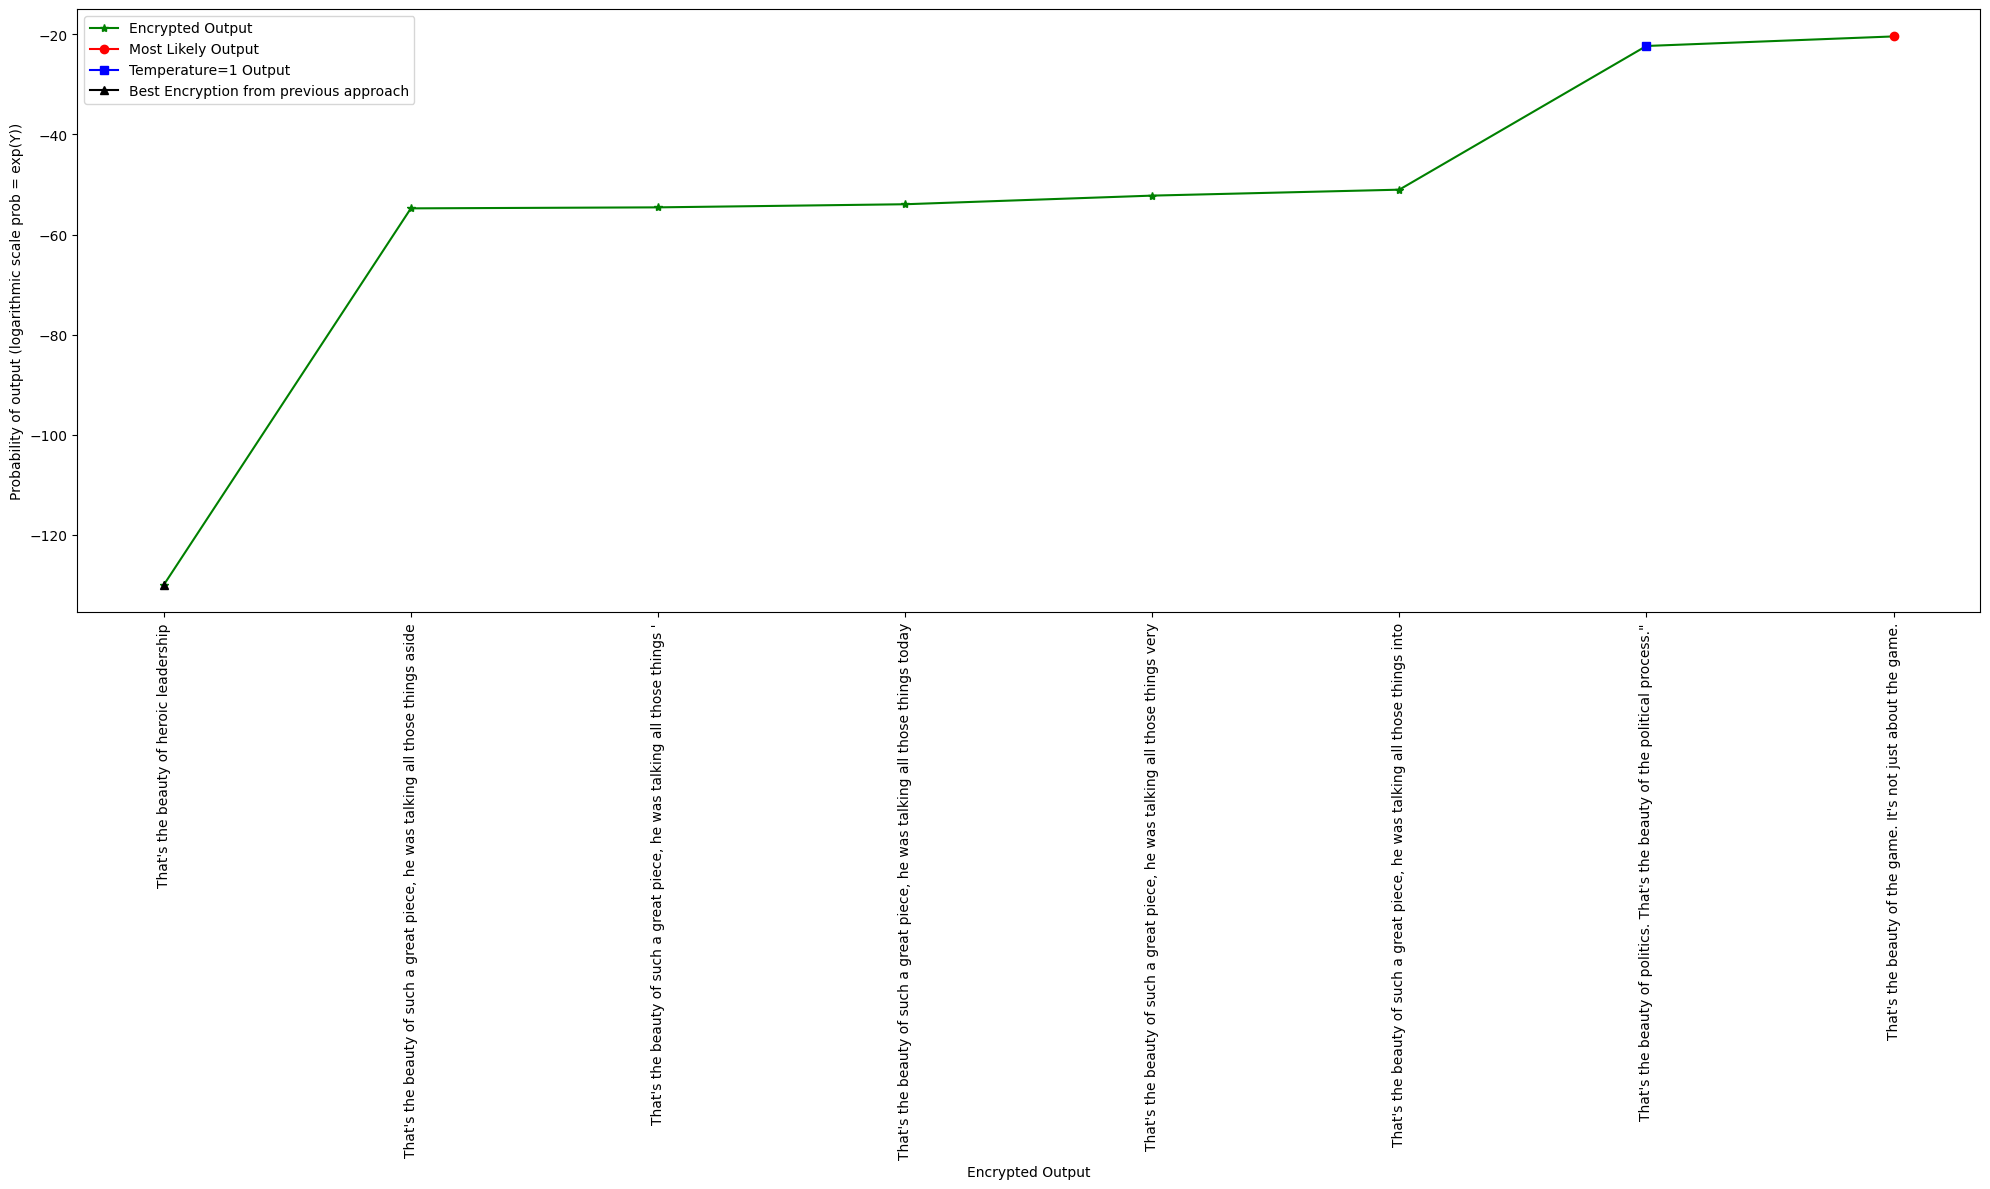

In [74]:
%load_ext autoreload
%autoreload 2

start = "That's the beauty of"

encrypts = [start + val for val in topk_encrypts_dict1[11]]
print(encrypts)

probs = [val for val in topk_probs_dict1[11]]
print(probs)


output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1)
print(output, prob)
encrypts.append(output)
probs.append(prob)

output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1e-20)
print(output, prob)
encrypts.append(output)
probs.append(prob)

# worst from old results
encrypts.append("That's the beauty of heroic leadership")
probs.append(-130)

plot_analysis(len(probs)-1, len(probs)-2, probs, encrypts, "thatsthebeauty_drugmeeting.png")

In [44]:
topk_probs_dict1[11], topk_encrypts_dict1[11]

([-51.035549998283386,
  -52.222622752189636,
  -53.94695746898651,
  -54.56870687007904,
  -54.768749594688416],
 [' such a great piece, he was talking all those things into',
  ' such a great piece, he was talking all those things very',
  ' such a great piece, he was talking all those things today',
  " such a great piece, he was talking all those things '",
  ' such a great piece, he was talking all those things aside'])

In [46]:
topk_probs_dict2, topk_encrypts_dict2, prob_dict2 = topk_analysis(model, start="What if", secret_message='drug meeting', mapping=mapping, topk=5)

100%|██████████| 1621/1621 [01:23<00:00, 19.48it/s]


[(-6.333869934082031, ' instead'), (-7.267234802246094, ' only'), (-7.760589599609375, ' You'), (-7.851165771484375, ' J'), (-8.088569641113281, ' Steve'), (-8.234458923339844, ' such'), (-8.267784118652344, ' …'), (-8.292762756347656, ' Amazon'), (-8.847183227539062, ' James'), (-8.907646179199219, ' four'), (-8.995872497558594, ' 9'), (-9.018089294433594, ' Putin'), (-9.038856506347656, ' No'), (-9.085731506347656, ' like'), (-9.380607604980469, ' Man'), (-9.431488037109375, ' big'), (-9.501190185546875, ' solar'), (-9.565406799316406, ' food'), (-9.570106506347656, ' Brandon'), (-9.587417602539062, ' teams'), (-9.696113586425781, ' j'), (-9.726310729980469, ' Rob'), (-9.742546081542969, ' Tolkien'), (-9.776924133300781, ' Sherlock'), (-9.777366638183594, ' public'), (-9.782066345214844, ' Ford'), (-9.787307739257812, ' fate'), (-9.793907165527344, ' Edward'), (-9.873565673828125, ' Netanyahu'), (-9.889633178710938, ' Air'), (-9.928848266601562, ' gaming'), (-10.054298400878906, ' Ju

100%|██████████| 1621/1621 [01:27<00:00, 18.60it/s]


topk_encrypts: [' Jack', ' only a', ' instead a', ' Joh', ' Jacqu']
topk_probs: [-9.38470458984375, -10.929556131362915, -12.105798244476318, -12.388442993164062, -12.562667846679688]


100%|██████████| 1621/1621 [01:34<00:00, 17.20it/s]


topk_encrypts: [' Johns', ' Jackass', ' Jack L', ' Jack P', ' only a woman']
topk_probs: [-12.649383544921875, -14.94002628326416, -15.665406227111816, -15.67604923248291, -15.691230058670044]


100%|██████████| 1621/1621 [01:59<00:00, 13.56it/s]


topk_encrypts: [' Jack Peter', ' Jack Lang', ' Jack Long', ' Jack Parks', ' Jack Pak']
topk_probs: [-18.27462863922119, -18.497971534729004, -18.954110145568848, -19.26290225982666, -19.537774085998535]


100%|██████████| 1621/1621 [01:49<00:00, 14.83it/s]


topk_encrypts: [' Jack Peter was', ' Jack Longh', ' Jack Lang was', ' Jack Parks was', ' Jack Long was']
topk_probs: [-19.693479776382446, -20.649285316467285, -20.8742094039917, -21.211453557014465, -21.273175716400146]


100%|██████████| 1621/1621 [01:51<00:00, 14.55it/s]


topk_encrypts: [' Jack Peter was actually', ' Jack Lang was actually', ' Jack Parks was actually', ' Jack Peter was watching', ' Jack Long was actually']
topk_probs: [-23.958885431289673, -24.97653293609619, -25.1875661611557, -25.404564142227173, -25.5261869430542]


100%|██████████| 1621/1621 [02:21<00:00, 11.49it/s]


topk_encrypts: [' Jack Peter was watching TV', ' Jack Peter was actually talking', ' Jack Lang was actually talking', ' Jack Peter was actually black', ' Jack Parks was actually talking']
topk_probs: [-28.973368883132935, -29.778604745864868, -30.98451280593872, -31.10137391090393, -31.11819875240326]


100%|██████████| 1621/1621 [02:22<00:00, 11.40it/s]


topk_encrypts: [' Jack Peter was watching TV TV', ' Jack Peter was watching TV last', ' Jack Peter was watching TV later', ' Jack Peter was watching TV games', ' Jack Peter was watching TV talking']
topk_probs: [-35.83260941505432, -36.31564164161682, -36.83797287940979, -36.95053696632385, -37.479055643081665]


100%|██████████| 1621/1621 [02:14<00:00, 12.02it/s]


topk_encrypts: [' Jack Peter was watching TV TV?', ' Jack Peter was watching TV games?', ' Jack Peter was watching TV later?', ' Jack Peter was watching TV TV all', ' Jack Peter was watching TV last Sunday']
topk_probs: [-37.55618727207184, -38.75907552242279, -38.89756536483765, -39.90179133415222, -40.50012469291687]


100%|██████████| 1621/1621 [02:18<00:00, 11.72it/s]


topk_encrypts: [' Jack Peter was watching TV TV? Can', ' Jack Peter was watching TV games? Can', ' Jack Peter was watching TV later? Can', ' Jack Peter was watching TV last Sunday in', ' Jack Peter was watching TV TV? Apparently']
topk_probs: [-43.62022793292999, -44.849448561668396, -44.86424398422241, -44.970083475112915, -45.22465908527374]


100%|██████████| 1621/1621 [02:19<00:00, 11.61it/s]


topk_encrypts: [' Jack Peter was watching TV TV? Can there', ' Jack Peter was watching TV TV? Apparently there', ' Jack Peter was watching TV later? Can there', ' Jack Peter was watching TV games? Can there', ' Jack Peter was watching TV TV? Canon']
topk_probs: [-49.25831949710846, -49.352864384651184, -50.428417682647705, -50.52676856517792, -51.39551222324371]


100%|██████████| 1621/1621 [02:36<00:00, 10.35it/s]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['What if Jack Peter was watching TV TV? Canon showed', 'What if Jack Peter was watching TV TV? Apparently there absolutely', 'What if Jack Peter was watching TV TV? Apparently there need', 'What if Jack Peter was watching TV TV? Canon Studio', 'What if Jack Peter was watching TV TV? Canon stuff']
[-58.045111298561096, -58.17716991901398, -58.711219906806946, -58.78285849094391, -58.797674775123596]
What if you already have the OilIndustrialsX and its tensor(-54.1365)
What if you could just get rid of all the stuff that's tensor(-22.7011)


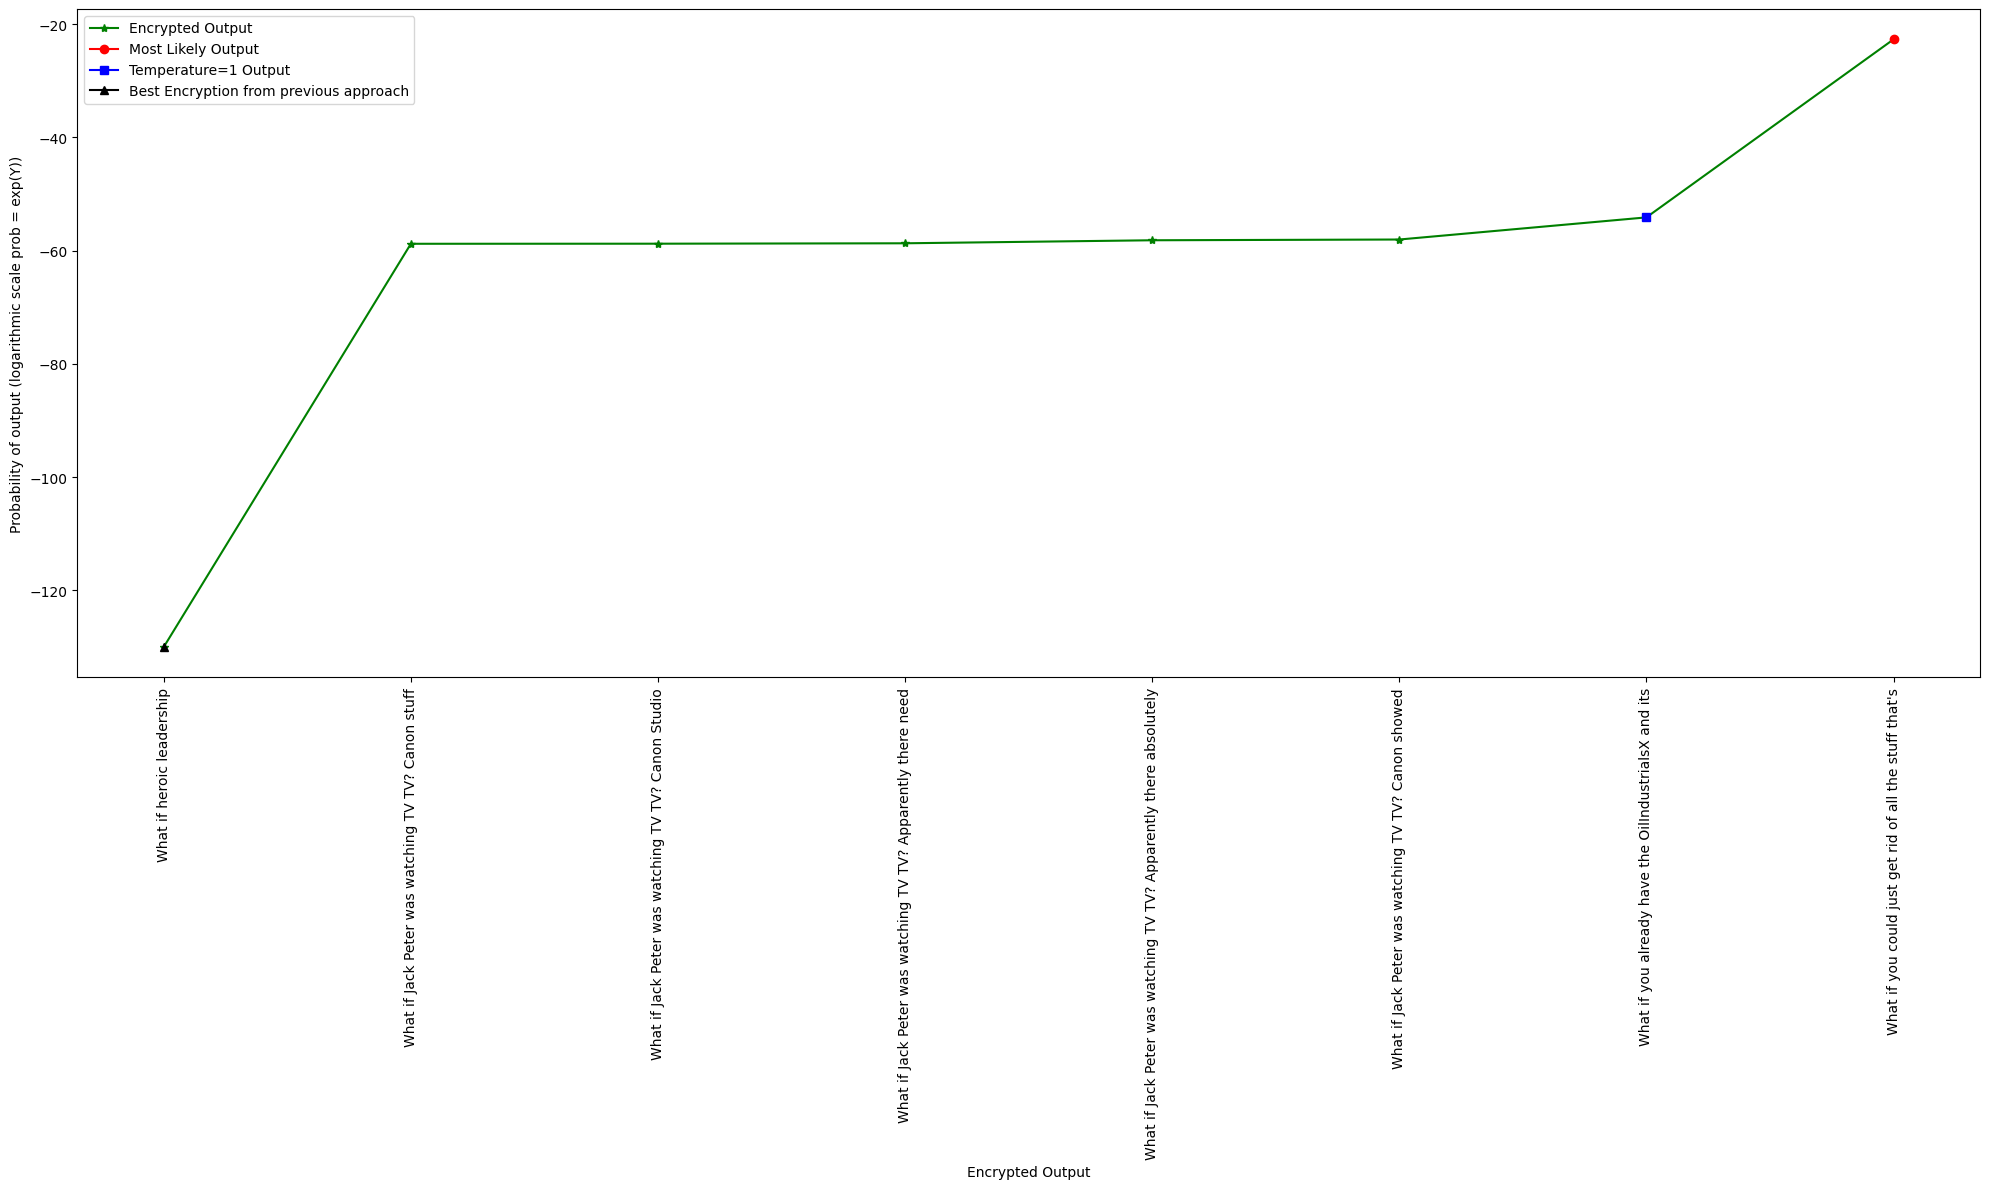

In [75]:
%load_ext autoreload
%autoreload 2

start = "What if"

encrypts = [start + val for val in topk_encrypts_dict2[11]]
print(encrypts)

probs = [val for val in topk_probs_dict2[11]]
print(probs)


output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1)
print(output, prob)
encrypts.append(output)
probs.append(prob)

output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1e-20)
print(output, prob)
encrypts.append(output)
probs.append(prob)

# worst from old results
encrypts.append("What if heroic leadership")
probs.append(-130)

plot_analysis(len(probs)-1, len(probs)-2, probs, encrypts, "whatif_drugmeeting.png")

In [47]:
topk_probs_dict2[11], topk_encrypts_dict2[11]

([-58.045111298561096,
  -58.17716991901398,
  -58.711219906806946,
  -58.78285849094391,
  -58.797674775123596],
 [' Jack Peter was watching TV TV? Canon showed',
  ' Jack Peter was watching TV TV? Apparently there absolutely',
  ' Jack Peter was watching TV TV? Apparently there need',
  ' Jack Peter was watching TV TV? Canon Studio',
  ' Jack Peter was watching TV TV? Canon stuff'])

In [20]:
len(mapping['c'])

1621

In [68]:
import json
def run(start, secret_message, mapping, topk, prob_dict=None):
    topk_probs_dict, topk_encrypts_dict, prob_dict = topk_analysis(model, start=start, secret_message=secret_message, mapping=mapping, topk=topk, prob_dict=prob_dict)
    current_datetime = datetime.datetime.now()

    # Write the dictionary to a file
    filename = f"{start}_{secret_message}_{current_datetime}.json"
    with open(filename, 'w') as f:
        json.dump(topk_probs_dict, f)
        json.dump(topk_encrypts_dict, f)
        
    return topk_probs_dict, topk_encrypts_dict, prob_dict

In [70]:
topk_probs_dict3, topk_encrypts_dict3, prob_dict3 = run("Why should I live in Wisconsin?", "attack", mapping, 3, prob_dict=prob_dict3)

  0%|          | 0/1624 [00:00<?, ?it/s]

100%|██████████| 1624/1624 [02:59<00:00,  9.04it/s]


[(-5.092530727386475, ' Is'), (-6.321450233459473, ' Our'), (-6.479264736175537, ' One'), (-7.591584205627441, ' Look'), (-7.630593776702881, ' Tell'), (-7.698907375335693, ' None'), (-7.720117092132568, ' Republican'), (-7.881570339202881, ' Was'), (-7.967477321624756, ' Then'), (-8.129754066467285, ' Generally'), (-8.218461036682129, ' Once'), (-8.284440040588379, ' Nobody'), (-8.397843360900879, ' Ten'), (-8.670968055725098, ' Sign'), (-8.719979286193848, ' T'), (-8.73647403717041, ' Alabama'), (-9.002373695373535, ' Historically'), (-9.200325965881348, ' Indiana'), (-9.21291446685791, ' Knowing'), (-9.367051124572754, ' Stat'), (-9.523606300354004, ' Buy'), (-9.545548439025879, ' \u200e'), (-9.59243106842041, ' Hmm'), (-9.700882911682129, ' Through'), (-9.789498329162598, ' Taxes'), (-9.892151832580566, ' Marriage'), (-9.898568153381348, ' Reason'), (-9.924134254455566, ' GOP'), (-10.066140174865723, ' Head'), (-10.086335182189941, ' Anything'), (-10.137238502502441, ' Judge'), (-1

 65%|██████▍   | 1041/1610 [01:31<00:49, 11.42it/s]


KeyboardInterrupt: 

In [ ]:
topk_probs_dict3, topk_encrypts_dict3, prob_dict3 = run("How many people don't have access to the internet?", "commit treason", mapping, 3, prob_dict=prob_dict3)

In [62]:
topk_probs_dict3, topk_encrypts_dict3

({0: [-4.631725311279297, -5.189769744873047, -6.408756256103516],
  1: [-9.124238014221191, -9.684647560119629, -10.029923439025879],
  2: [-11.822221517562866, -13.427488565444946, -15.591256618499756],
  3: [-17.897827863693237, -18.16811442375183, -18.61379313468933],
  4: [-22.999939680099487, -23.086934328079224, -23.897373914718628],
  5: [-28.628803491592407, -28.62948250770569, -29.25625777244568]},
 {0: [' indication', ' legal', ' definitive'],
  1: [' indication from', ' indication any', ' indication whether'],
  2: [' indication from any',
   ' indication whether any',
   ' indication from WHO'],
  3: [' indication from any legal',
   ' indication from any indication',
   ' indication from any reporting'],
  4: [' indication from any legally',
   ' indication from any legal opinion',
   ' indication from any legal standpoint'],
  5: [' indication from any legally accessible',
   ' indication from any legally permitted',
   ' indication from any legal opinion it']})

In [14]:
%load_ext autoreload
%autoreload 2

start = "There is no"

encrypts = [start + val for val in topk_encrypts_dict3[5]]
print(encrypts)

probs = [val for val in topk_probs_dict3[5]]
print(probs)


output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1)
print(output, prob)
encrypts.append(output)
probs.append(prob)

output, prob = compute_generation_with_prob(model, start=start, num_words=11, temperature=1e-20)
print(output, prob)
encrypts.append(output)
probs.append(prob)

plot_analysis(len(probs)-1, len(probs)-2, probs, encrypts, "thereisno_attack.png", worst=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'topk_encrypts_dict3' is not defined

In [15]:
topk_probs_dict3[5], topk_encrypts_dict3[5]

NameError: name 'topk_probs_dict3' is not defined

In [13]:
topk_probs_dict4, topk_encrypts_dict4, prob_dict4 = topk_analysis(model, start="What if", secret_message='the drug meeting will be at noon', mapping=mapping, topk=3)

 29%|██▊       | 464/1621 [00:17<00:43, 26.68it/s]


KeyboardInterrupt: 

In [12]:
topk_probs_dict4, topk_encrypts_dict4

NameError: name 'topk_probs_dict4' is not defined

In [ ]:
_ = torch.tensor(encode("You can find urn files"), dtype=torch.long, device=device)[None, ...]
print(_)
prob_dict[str(_)]

tensor([[1639,  460, 1064,  220,  700, 3696]])


-5.010562896728516

In [ ]:
%load_ext autoreload
%autoreload 2
compute_prob_of_output(model, "urn files", "You can find ")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


('You can find urn files',
 -8.442264556884766,
 {'tensor([[1639,  460, 1064,  220,  700]])': -3.43170166015625,
  'tensor([[1639,  460, 1064,  220,  700, 3696]])': -8.442264556884766})

In [ ]:
probs, encrypts = better_analysis(model, start="that's the beauty of ", secret_message='drug meeting', mapping=mapping)
plot_analysis(len(encrypts) - 1, len(encrypts) - 2, probs, encrypts, "drug-meeting.png")

h:tensor([30349,  3249])
tensor(30349)
already computed that's the beauty of drug
tensor(3249)
already computed that's the beauty of drug meeting
tensor([[ 5562,   338,   262,  8737,   286,   220, 30349,  3249]])
best encryption: "that's the beauty of drug meeting" with probability -25.613479614257812


KeyboardInterrupt: 

In [ ]:
probs, encrypts = better_analysis(model, start='what if ', secret_message="drug meeting", mapping=mapping)
plot_analysis(len(encrypts) - 1, len(encrypts) - 2, probs, encrypts, "drug-meeting-ext.png")